# Experiments

***Changes***
- New features added to the state vector
- Graph fixed
- Environment refactored

In [1]:
cd ~/downloads/Pedro-Pineapple/forecasting

/home/aargaez/downloads/Pedro-Pineapple/forecasting


In [2]:
# Libraries.
import matplotlib.pyplot as plt
import pandas as pd
import environments

from stable_baselines3 import A2C

In [3]:
# Read data.
data = pd.read_csv('~/downloads/Pedro-Pineapple/data/SPY_20172023.csv')

In [4]:
# Split percentage of the data
splitter = round(data.shape[0] * .7)
splitter

1203

In [5]:
# Split the dataset.
# TODO: Function to automate these.
# TODO: Label the data.
df_train = data.iloc[:splitter]
df_test = data.iloc[splitter:]

In [6]:
# Create the environment.
env = environments.Forecasting(
    df=df_train, window_size=5
)

In [7]:
# Random walk.
state = env.reset(seed=2008)

while True:
    # Sample action from space.
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(
        action=action
    )

    if done or truncated:
        print('info', info, '\n')
        break

info {'total_reward': 822.8999481201172} 



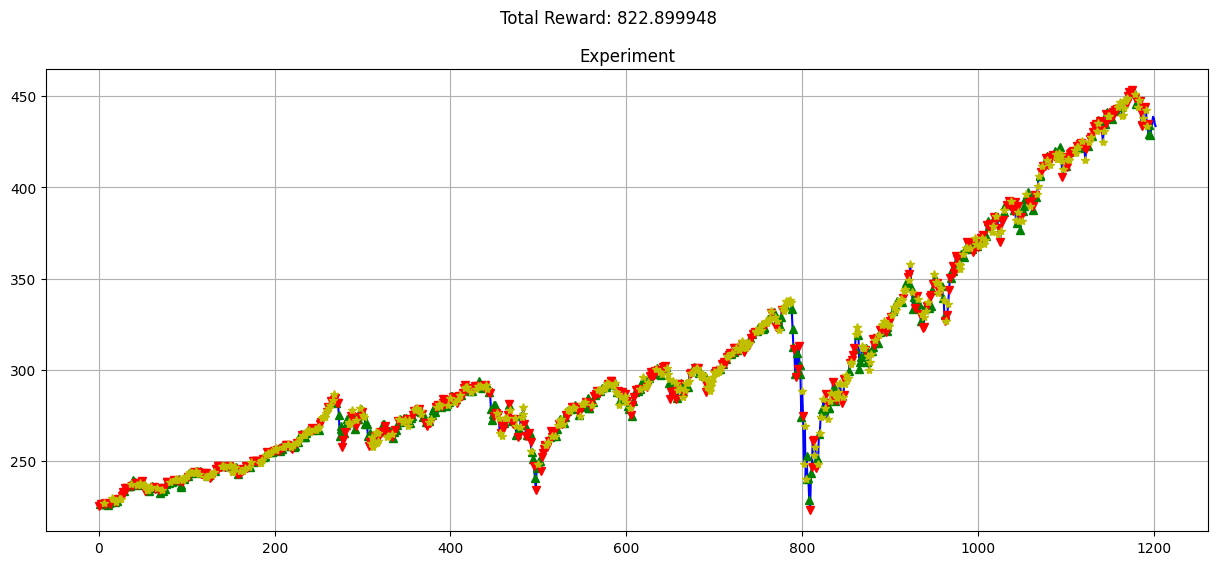

In [8]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all(title='Experiment')
plt.show()

In [9]:
# Train environment.
model = A2C(policy='MlpPolicy', env= env, verbose=1) 
model.learn(total_timesteps=100)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
observation, info = env.reset()

while True:
    action, _states = model.predict(observation=observation)
    observation, reward, done, truncated, info = env.step(action=action)

    if done or truncated:
        print('info', info, '\n')
        break

info {'total_reward': 1124.3497161865237} 



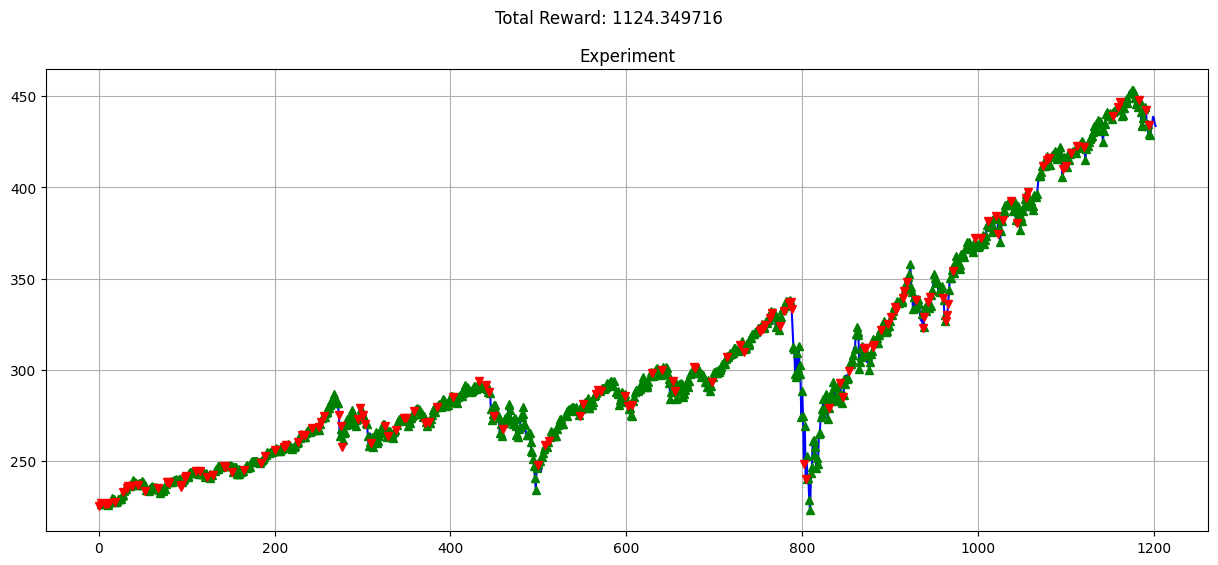

In [11]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all(title='Experiment')
plt.show()